<a href="https://colab.research.google.com/github/Gautam-Jaiswal/Exploring-Matploit--Project-2/blob/main/Matploit_Set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Statements

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [172]:
df = pd.read_csv('QueryResults.csv', names=['Dates','Tags','Posts'],header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [173]:
df.head()

,Dates,Tags,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [174]:
df.tail()

,Dates,Tags,Posts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [175]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [176]:
df.count()

Dates    1991
Tags     1991
Posts    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [177]:
#df.groupby('Tags').count() ....IT IS USED TO RETURN THE COUNT OF NUMBER OF ENTRIES
df.groupby('Tags').sum()

,Posts
Tags,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other 
languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [178]:
df.groupby('Tags').count()

,Dates,Posts
Tags,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [179]:
pd.to_datetime(df['Dates'][1])

Timestamp('2008-08-01 00:00:00')

In [180]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [181]:
df.head()

,Dates,Tags,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



Reshaping our df into new reshaped_df using pivot()

In [182]:
reshaped_df = df.pivot(index='Dates', columns='Tags', values='Posts')
reshaped_df.head()

Tags,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Dates,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [183]:
reshaped_df.shape

(145, 14)

In [184]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tags')

In [185]:
reshaped_df.tail()

Tags,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Dates,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [186]:
reshaped_df.count()

Tags
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [187]:
reshaped_df.fillna(value=0,inplace=True)

In [188]:
reshaped_df.head()

Tags,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Dates,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [189]:
print(reshaped_df.isna().values.any())
print()
reshaped_df.isna().any()

False



Tags
assembly      False
c             False
c#            False
c++           False
delphi        False
go            False
java          False
javascript    False
perl          False
php           False
python        False
r             False
ruby          False
swift         False
dtype: bool

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

Plotting two graphs

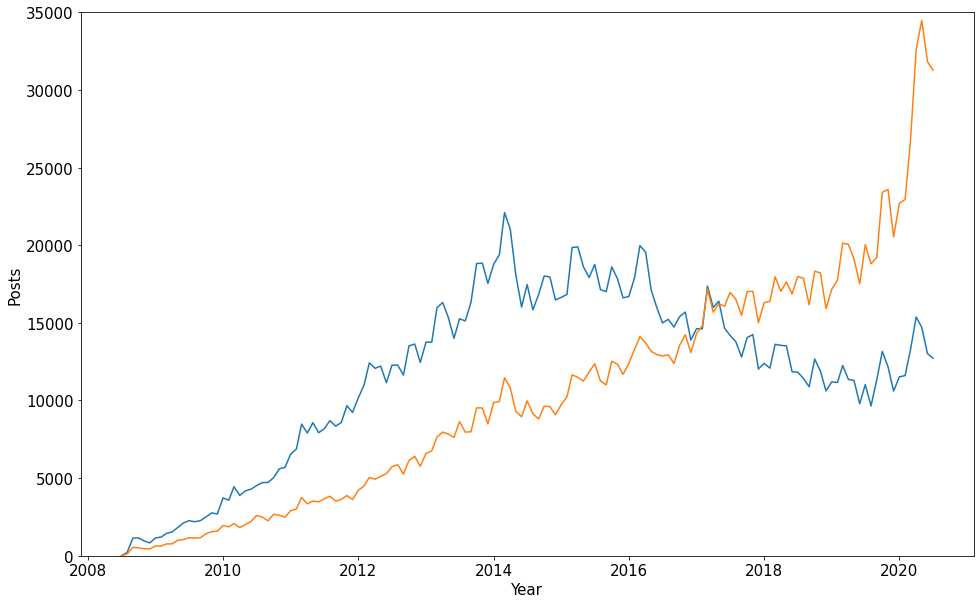

In [190]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Posts', fontsize=15)
plt.ylim(0,35000)

plt.plot(reshaped_df['java'])
plt.plot(reshaped_df['python'])

Plotting all the languages graph

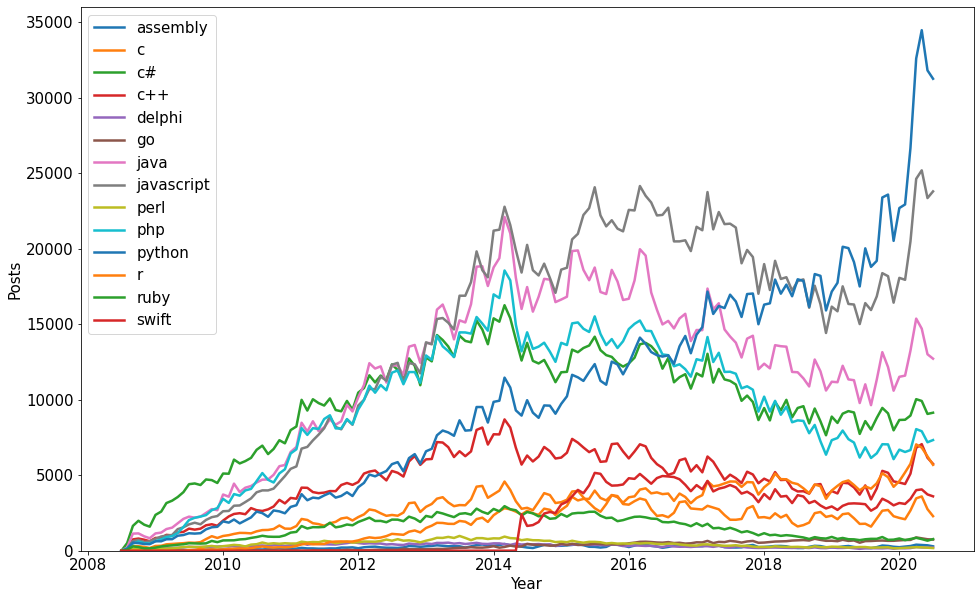

In [191]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Posts', fontsize=15)
plt.ylim(0, 36000)

for col in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[col], linewidth=2.5, label = reshaped_df[col].name)

plt.legend(fontsize=15)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [192]:
roll_df = reshaped_df.rolling(6).mean()

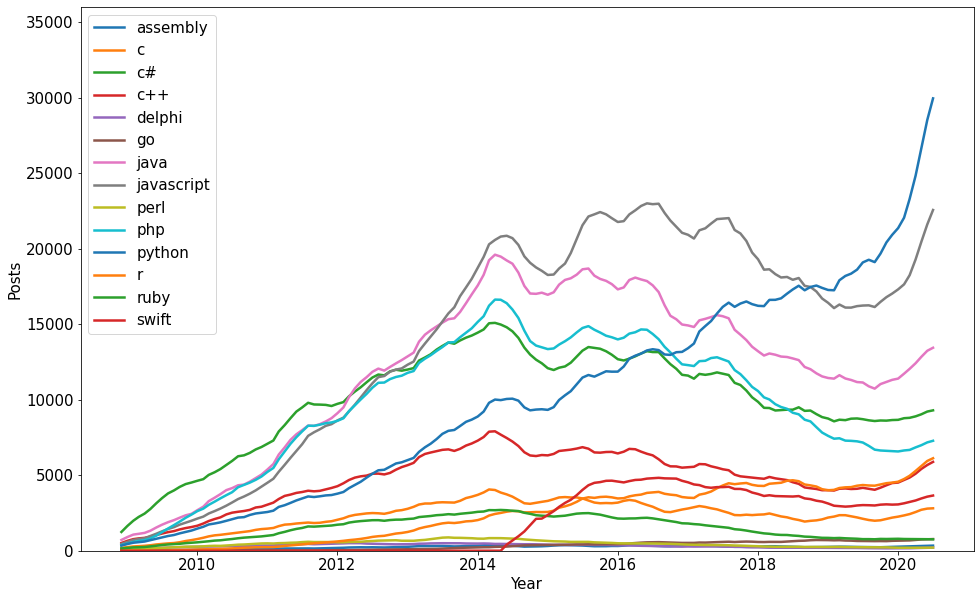

In [193]:
plt.figure(figsize=(16,10))
plt.xlabel('Year',fontsize=15)
plt.ylabel('Posts',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,36000)

for col in roll_df.columns:
  plt.plot(roll_df.index, roll_df[col], linewidth=2.5, label=roll_df[col].name)

plt.legend(fontsize=15)